In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Read the first dataset
df1 = pd.read_csv('../measurements_final/measurements_haskell.csv')

# Read the second dataset
df2 = pd.read_csv('../measurements_final/measurements_c.csv')

# Read the third dataset
df3 = pd.read_csv('../measurements_final/measurements_java.csv')

# Read the fourth dataset
df4 = pd.read_csv('../measurements_final/measurements_ruby.csv')

# Read the fifth dataset
df5 = pd.read_csv('../measurements_final/measurements_rust.csv')

# Read the sixth dataset
df6 = pd.read_csv('../measurements_final/measurements_python.csv')

def remove_outliers(group):
    sorted_group = group.sort_values(by='Package')
    return sorted_group.iloc[2:-2]

def remove_outliers2(group):
    # Sort group by 'Package' and remove the 2 smallest and 2 largest outliers
    group = group.sort_values(by='Package')
    group = group.iloc[1:-2]  # Remove top 2 and bottom 2 for 'Package'

    # Sort the remaining group by 'Core' and remove the 2 smallest and 2 largest outliers
    group = group.sort_values(by='Core')
    group = group.iloc[1:-2]  # Remove top 2 and bottom 2 for 'Core'

    return group

# Group by 'Program' and 'PowerLimit' and apply the function to remove outliers
df1 = df1.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
df2 = df2.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
df3 = df3.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
df4 = df4.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
df5 = df5.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
df6 = df6.groupby(['Program', 'PowerLimit']).apply(remove_outliers2).reset_index(drop=True)

# Concatenate the datasets vertically
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Filter out rows where Package is negative
df = df[df['Package'] >= 0]

# Drop the unnecessary columns
df.drop(columns=["DRAM", "GPU"], inplace=True)

# Function to filter the dataset based on language and PowerLimit, while keeping PowerLimit = -1
def filter_dataset_by_language_and_powerlimit(df, language, power_limit):
    """
    Filters the dataset based on the given language and PowerLimit, 
    while always including rows with PowerLimit = -1.

    Args:
        df (pd.DataFrame): The combined dataset.
        language (str): The language to filter by (e.g., 'Python').
        power_limit (int): The PowerLimit value to filter by (e.g., 4).

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Ensure the language exists in the dataset
    if language not in df['Language'].unique():
        raise ValueError(f"Language '{language}' not found in the dataset.")
    
    # Filter by language
    filtered_df = df[df['Language'] == language]
    
    # Include both the selected PowerLimit and PowerLimit = -1
    filtered_df = filtered_df[filtered_df['PowerLimit'].isin([power_limit, -1])]
    
    return filtered_df

# Apply the filter function to each language and PowerLimit
filtered_df1 = filter_dataset_by_language_and_powerlimit(df, 'Python', 4)
filtered_df2 = filter_dataset_by_language_and_powerlimit(df, 'Haskell', 4)
filtered_df3 = filter_dataset_by_language_and_powerlimit(df, 'C', 4)
filtered_df4 = filter_dataset_by_language_and_powerlimit(df, 'Java', 5)
filtered_df5 = filter_dataset_by_language_and_powerlimit(df, 'Rust', 4)
filtered_df6 = filter_dataset_by_language_and_powerlimit(df, 'Ruby', 1)

# Concatenate all filtered DataFrames into one
final_df = pd.concat([filtered_df1, filtered_df2, filtered_df3, filtered_df4, filtered_df5, filtered_df6], ignore_index=True)

final_df['Time'] = final_df['Time'] / 1000 

# Group by 'Language' and 'PowerLimit' and calculate the mean for each group
mean_df = final_df.groupby(['Language', 'Program', 'PowerLimit']).mean().reset_index()

# Clean the 'Program' column to ensure consistent formatting
mean_df['Program'] = mean_df['Program'].str.strip().str.lower()

# Filter the DataFrame to exclude "docutils"
mean_df = mean_df[mean_df['Program'] != 'docutils']

# Print the mean DataFrame
print(mean_df)


    Language                  Program  PowerLimit    Package       Core  \
0          C             blackscholes          -1  10.607442   9.913401   
1          C             blackscholes           4   4.914530   3.006826   
2          C                  canneal          -1  13.534475  12.665812   
3          C                  canneal           4   6.094299   3.711782   
4          C             fluidanimate          -1  10.888133  10.177979   
..       ...                      ...         ...        ...        ...   
101     Rust                mergesort           4   0.065338   0.038920   
102     Rust                quicksort          -1   0.135529   0.132579   
103     Rust                quicksort           4   0.059804   0.037496   
104     Rust  removeduplicateelements          -1   0.131724   0.127370   
105     Rust  removeduplicateelements           4   0.065033   0.040029   

         Time  Temperature        Memory  
0    0.436167    43.866667  53110.666667  
1    1.228167

/tmp/ipykernel_5658/3685465598.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df1.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
/tmp/ipykernel_5658/3685465598.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df2.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)
/tmp/ipykernel_5658/3685465598.py:46: DeprecationWarning: Da

In [8]:
# Create a new column to categorize PowerLimit as either -1 or rest
final_df['PowerLimit_group'] = final_df['PowerLimit'].apply(lambda x: '-1' if x == -1 else 'rest')

# Group by the new column and calculate the sum for Package and Time
sum_df = final_df.groupby('PowerLimit_group')[['Package', 'Time']].sum().reset_index()

# Display the table
print(sum_df)


  PowerLimit_group       Package      Time
0               -1  71179.259888  2641.028
1             rest  28796.366943  6703.488


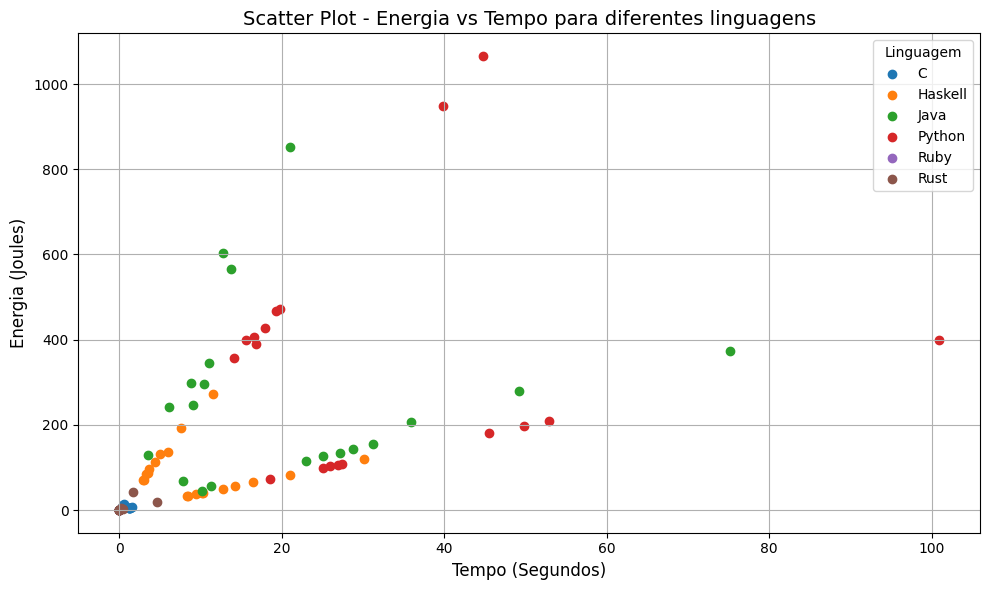

In [16]:
# Assuming `mean_df` is the DataFrame with the required data (Package, Time)
# The `mean_df` DataFrame should already be available from the previous steps.

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plotting the 'Package' (in Joules) vs 'Time' (in seconds)
# Use the 'Language' and 'PowerLimit' for different colors or markers if you want
# Here we're plotting Package vs Time

for language in mean_df['Language'].unique():
    # Filter data for each language
    language_data = mean_df[mean_df['Language'] == language]
    
    # Scatter plot: 'Package' on x-axis and 'Time' on y-axis
    plt.scatter(language_data['Time'], language_data['Package'], label=language)

# Adding labels and title
plt.ylabel('Energia (Joules)', fontsize=12)
plt.xlabel('Tempo (Segundos)', fontsize=12)
plt.title('Scatter Plot - Energia vs Tempo para diferentes linguagens', fontsize=14)

# Add a legend to identify the languages
plt.legend(title='Linguagem', fontsize=10)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_languages.png', dpi=300, bbox_inches='tight')
plt.show()

/home/dinises/MEI/PEI/PEI/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dinises/MEI/PEI/PEI/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


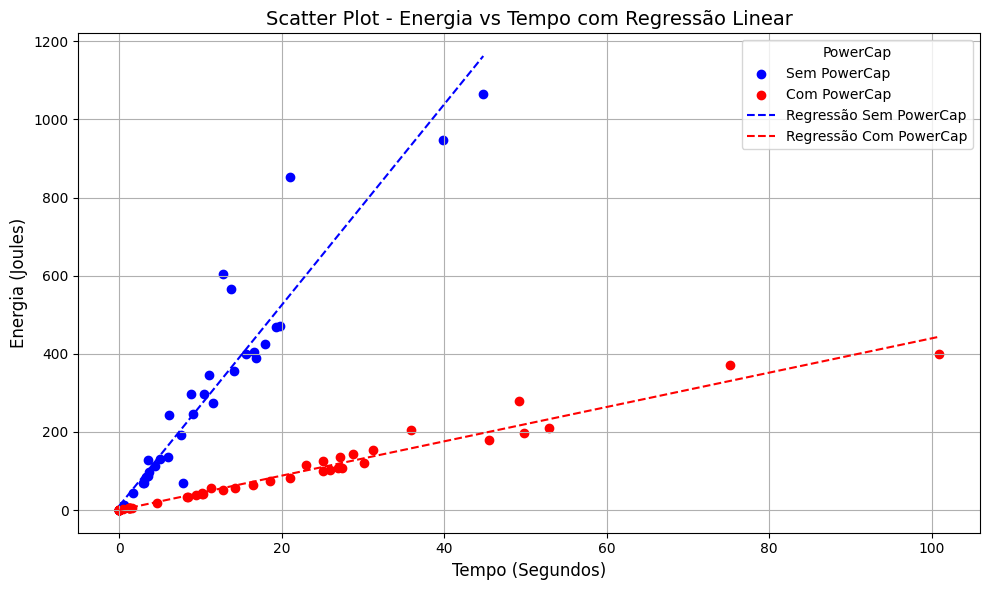

No PowerCap Regression Coefficients:
Coefficient: [25.69762643]
Intercept: 11.088788051784178

With PowerCap Regression Coefficients:
Coefficient: [4.39380644]
Intercept: 0.23569735153576232


In [17]:
# Separate the data into two subsets based on PowerLimit
df_powerlimit_minus1 = mean_df[mean_df['PowerLimit'] == -1]
df_powerlimit_other = mean_df[mean_df['PowerLimit'] != -1]

# Perform regression for PowerLimit = -1
reg_minus1 = LinearRegression()
X_minus1 = df_powerlimit_minus1[['Time']]  # Independent variable: Time
y_minus1 = df_powerlimit_minus1['Package']  # Dependent variable: Package
reg_minus1.fit(X_minus1, y_minus1)

# Perform regression for PowerLimit != -1
reg_other = LinearRegression()
X_other = df_powerlimit_other[['Time']]  # Independent variable: Time
y_other = df_powerlimit_other['Package']  # Dependent variable: Package
reg_other.fit(X_other, y_other)

# Create the scatter plot for both PowerLimits
plt.figure(figsize=(10, 6))

# Scatter plot for PowerLimit = -1
plt.scatter(df_powerlimit_minus1['Time'], df_powerlimit_minus1['Package'], color='blue', label='Sem PowerCap')

# Scatter plot for PowerLimit != -1
plt.scatter(df_powerlimit_other['Time'], df_powerlimit_other['Package'], color='red', label='Com PowerCap')

# Plot the regression line for PowerLimit = -1
time_range_minus1 = np.linspace(df_powerlimit_minus1['Time'].min(), df_powerlimit_minus1['Time'].max(), 100).reshape(-1, 1)
package_pred_minus1 = reg_minus1.predict(time_range_minus1)
plt.plot(time_range_minus1, package_pred_minus1, color='blue', linestyle='--', label='Regressão Sem PowerCap')

# Plot the regression line for PowerLimit ≠ -1
time_range_other = np.linspace(df_powerlimit_other['Time'].min(), df_powerlimit_other['Time'].max(), 100).reshape(-1, 1)
package_pred_other = reg_other.predict(time_range_other)
plt.plot(time_range_other, package_pred_other, color='red', linestyle='--', label='Regressão Com PowerCap')

# Adding labels and title
plt.ylabel('Energia (Joules)', fontsize=12)
plt.xlabel('Tempo (Segundos)', fontsize=12)
plt.title('Scatter Plot - Energia vs Tempo com Regressão Linear', fontsize=14)

# Add a legend
plt.legend(title='PowerCap', fontsize=10)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_with_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the regression coefficients and intercepts for each PowerLimit group
print("No PowerCap Regression Coefficients:")
print("Coefficient:", reg_minus1.coef_)
print("Intercept:", reg_minus1.intercept_)

print("\nWith PowerCap Regression Coefficients:")
print("Coefficient:", reg_other.coef_)
print("Intercept:", reg_other.intercept_)